In [1]:
#import pandas
import pandas as pd
import numpy as np


In [2]:
path = 'D:\iris_data.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
print(data.shape[0]) # printing number of rows

150


In [5]:
print(data.columns.tolist()) # Checking all the columns name

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [6]:
print(data.dtypes) # Data type checking

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Question 2
Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.



In [7]:
# The str method maps the following function to each entry as a string
data['species']= data.species.str.replace('Irish-', '')

# alternative way
# data['variety'] = data.variety.apply(lambda r: r.replace('Iris-', ''))


In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Question 3
Determine the following:

The number of each species present. 

The mean, median, and quantiles and ranges (max-min) for each petal and sepal measuremen

In [9]:
#The number of each species present.
data.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [10]:
data.describe()# shows the mean max min std count etc of the data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
data_df= data.describe()
data_df.loc['max'] - data_df.loc['min']

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

In [14]:
data_df.loc['range'] = data_df.loc['max'] - data_df.loc['min'] # We are adding row range to our dataframe

In [17]:
data_df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [18]:
# Only selecting these fields from the dataframe

out_fields = ['mean','25%','50%','75%', 'range']
data_df = data_df.loc[out_fields]

In [19]:
data_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
50%,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [20]:
# renameing the 50% row to 'median'
data_df.rename({'50%': 'median'}, inplace=True)

In [21]:
data_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [22]:
# all the steps together
#The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement

#data_df = data.describe()
#data_df.loc['range'] = data_df.loc['max'] - data_df.loc['min']

#out_fields = ['mean','25%','50%','75%', 'range']
#data_df = data_df.loc[out_fields]
#data_df.rename({'50%': 'median'}, inplace=True)
#data_df

# Question 4
Calculate the following for each species in a separate dataframe:

The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
The median of each of these measurements.

In [17]:
#mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [18]:
# median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [24]:
# Performing mean median at the same time using groupby
data.groupby('species').agg(['mean', 'median']) # passing a list of recognized strings

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [25]:
# Performing mean median at the same time using groupby
data.groupby('species').agg([np.mean, np.median]) # passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [23]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)
### END SOLUTION

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

# Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

[Text(0, 0.5, 'width'),
 Text(0.5, 0, 'length'),
 Text(0.5, 1.0, 'Scatter Plot (Sepal Length vs Width in cm)')]

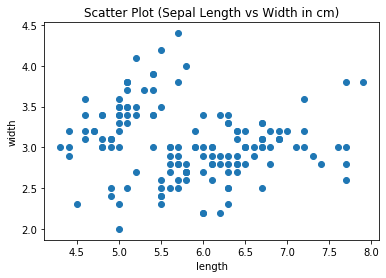

In [25]:
# Matplotlib ploting
import matplotlib.pyplot as plt

ax= plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)
ax.set(xlabel='length', ylabel='width', title='Scatter Plot (Sepal Length vs Width in cm)')


# Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

In [26]:
# histogram

ax.hist(data.petal_length, bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths')


[Text(17.200000000000003, 0.5, 'Frequency'),
 Text(0.5, 17.200000000000003, 'Petal Length (cm)'),
 Text(0.5, 1, 'Distribution of Petal Lengths')]

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Petal Length (cm)'),
 Text(0.5, 1.0, 'Distribution of Petal Lengths')]

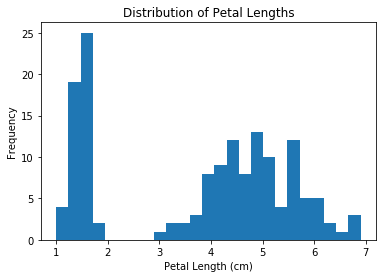

In [27]:
# Alternatively using Pandas plotting functionality
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths')
### END SOLUTION

# Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

In [28]:
import seaborn as sns

In [29]:
sns.set_context('notebook')

[Text(0.5, 0, 'size in cm')]

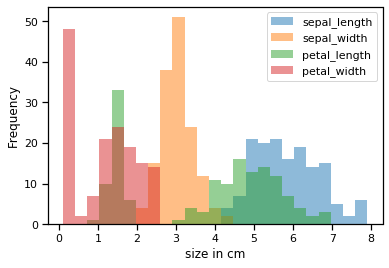

In [30]:
ax = data.plot.hist(bins=25, alpha=0.5) # alpha is the color contrast
ax.set(xlabel='size in cm')

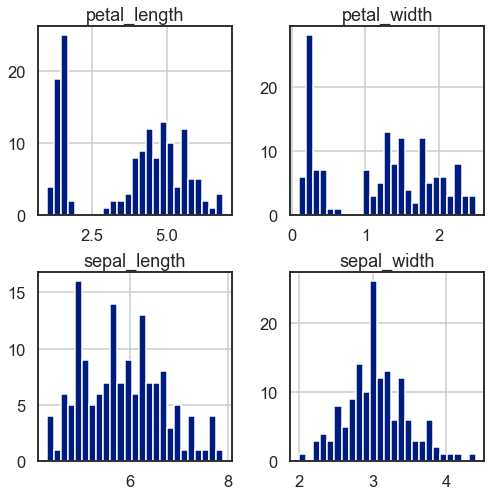

In [53]:
# To create four separate plots use pandas .hist method
axList = data.hist(bins=25, figsize=(8,8))

In [55]:
axList.shape

(2, 2)

In [56]:
axList.flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C376ACE388>,
      dtype=object)

In [57]:
axList.flatten().shape

(4,)

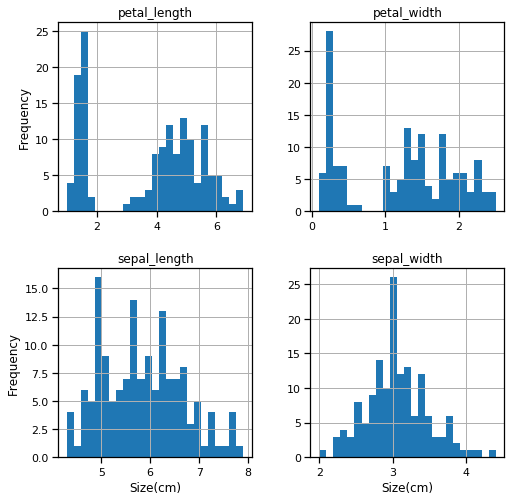

In [31]:
# create four separate plots use pandas .hist method and labeling them
axList = data.hist(bins=25, figsize=(8,8))

# adding X and y colomn labels
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size(cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
    

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


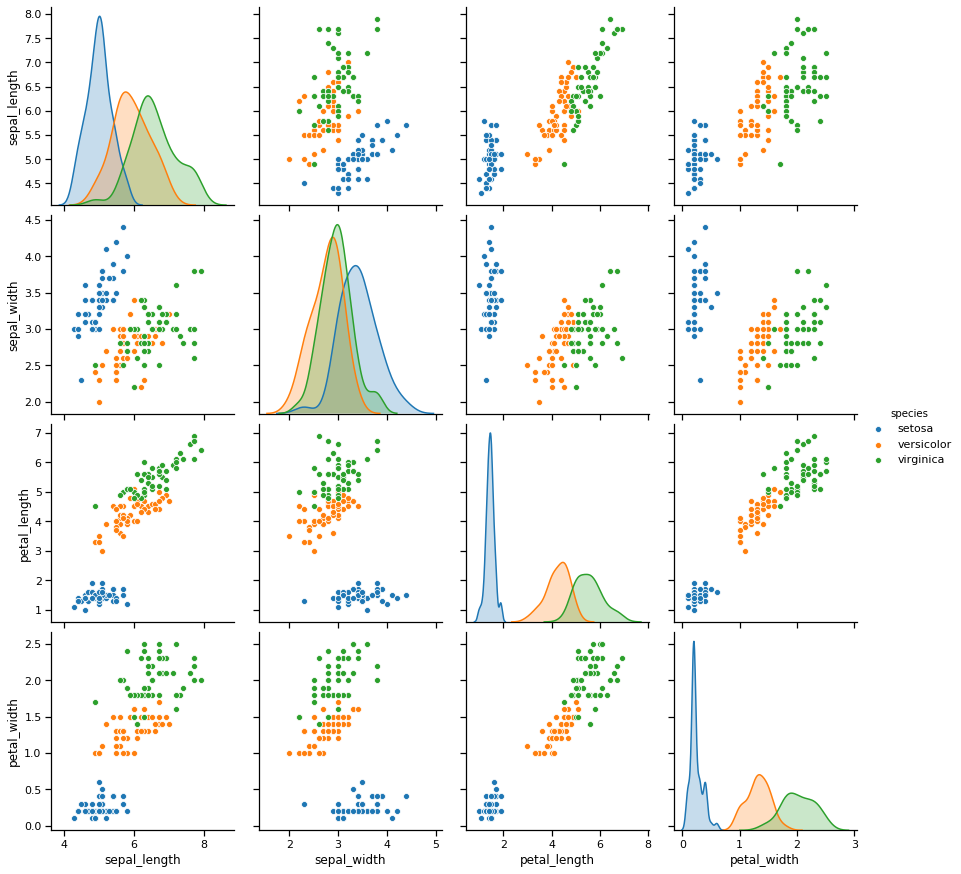

In [32]:
sns.pairplot(data, hue='species', size=3) # using pairplot from seaborn

# Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C36EC1D348>,
      dtype=object)

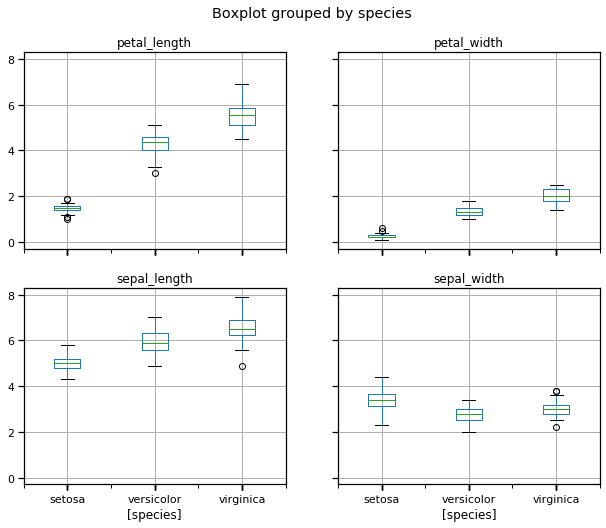

In [33]:
# boxplot
data.boxplot(by='species', figsize =(10, 8))

# Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 


Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [34]:
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
            .set_index('species')
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns={0:'size', 'level_1':'measurement'})
            )

In [35]:
plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


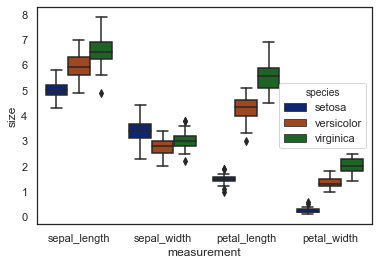

In [36]:
# now ploting data
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f= plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', hue='species', data=plot_data)

# Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


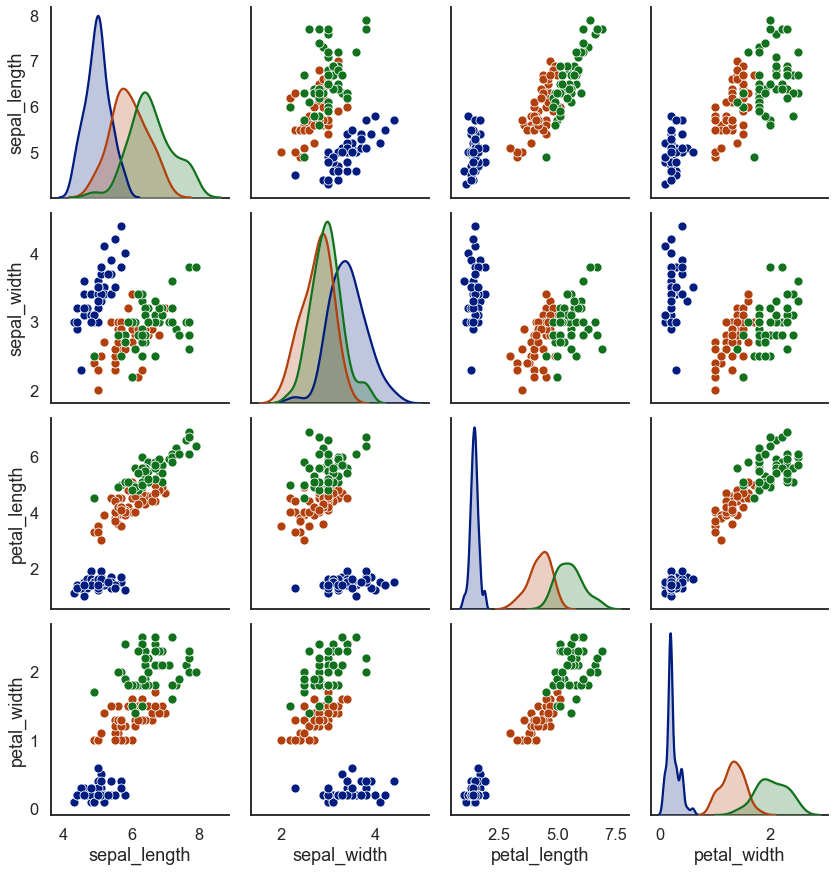

In [43]:
sns.set_context('talk')
pair_plot = sns.pairplot(data, hue='species', size=3)
pair_plot._legend.remove()
pair_plot

# Just random Practicing

In [44]:
# sample method allow us to take random rows from the dataset,
# n represents number of rows
# replace is by default false. if we put true, it will take duplicate row value

sample = data.sample(n=15, replace=False)

In [45]:
# .iloc is taking the all of the rows
# -3 means we are only printing the last three column
print(sample.iloc[:,-3:])

     petal_length  petal_width     species
34            1.5          0.1      setosa
106           4.5          1.7   virginica
136           5.6          2.4   virginica
83            5.1          1.6  versicolor
128           5.6          2.1   virginica
33            1.4          0.2      setosa
47            1.4          0.2      setosa
19            1.5          0.3      setosa
3             1.5          0.2      setosa
70            4.8          1.8  versicolor
8             1.4          0.2      setosa
45            1.4          0.3      setosa
28            1.4          0.2      setosa
51            4.5          1.5  versicolor
9             1.5          0.1      setosa


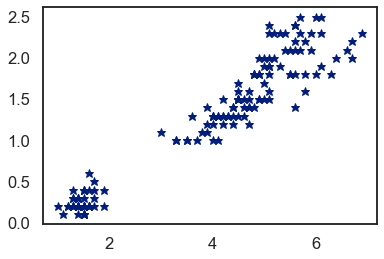

In [46]:

# plt.plot() will plot the values
# ls hear means lines and marker is to represnt the intended data

plt.plot(data.petal_length, data.petal_width, ls='', marker='*', label='petal')


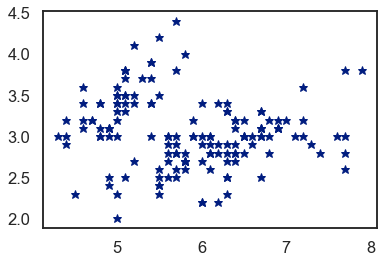

In [47]:
# Ploting another value will automatically assign different color to distinguiush them 
plt.plot(data.sepal_length, data.sepal_width, ls='', marker='*',label='sepal')

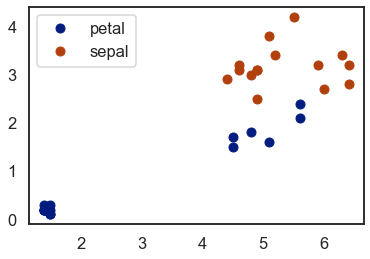

In [48]:
# using the sample data
plt.plot(sample.petal_length, sample.petal_width, ls='', marker='o', label='petal')
plt.plot(sample.sepal_length, sample.sepal_width, ls='', marker='o',  label='sepal')
plt.legend()

(array([1., 0., 2., 0., 1., 0., 3., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 1., 2.]),
 array([4.4 , 4.48, 4.56, 4.64, 4.72, 4.8 , 4.88, 4.96, 5.04, 5.12, 5.2 ,
        5.28, 5.36, 5.44, 5.52, 5.6 , 5.68, 5.76, 5.84, 5.92, 6.  , 6.08,
        6.16, 6.24, 6.32, 6.4 ]),
 <a list of 25 Patch objects>)

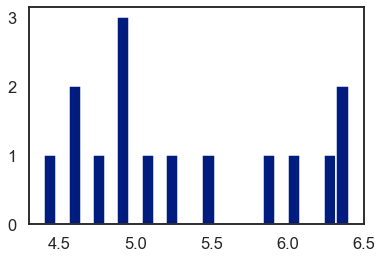

In [49]:
# Pandas dataframe approach
#histogram (Using the sample data)
plt.hist(sample.sepal_length, bins=25)

[Text(0, 0.5, 'ylabel'), Text(0.5, 0, 'xlabel'), Text(0.5, 1.0, 'Title')]

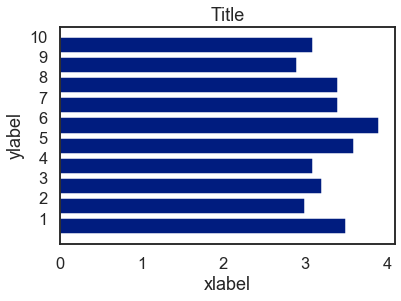

In [50]:
# matplotlib approach
fig, ax= plt.subplots()
ax.barh(np.arange(10),
       data.sepal_width.iloc[:10:])# barh is the horizontal bar

# Set position of ticks and tick labels
ax.set_yticks(np.arange(0.4, 10.4, 1.0)) # means arranging from 0.4 to 10.4 with the difference of 1
ax.set_yticklabels(np.arange(1, 11))
ax.set(xlabel='xlabel', ylabel='ylabel', title='Title')


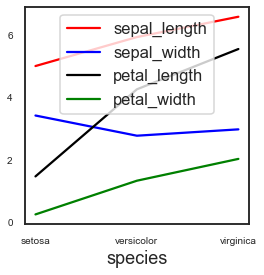

In [51]:
# Pandas Syntex for ploting
data.groupby('species').mean().plot(color=['red','blue','black','green'], fontsize= 10.0, figsize= (4,4))

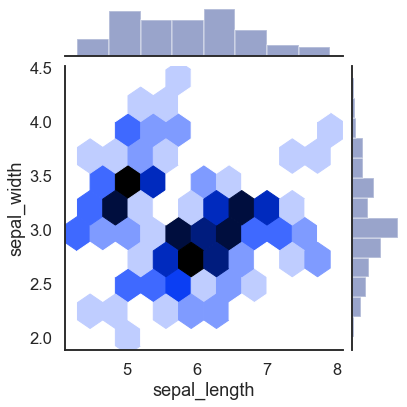

In [52]:
# seaborn hexbin plot
sns.jointplot(x=data['sepal_length'], y=data['sepal_width'], kind='hex')